# Banking Dataset - Marketing Targets
Banking Dataset of different customers to predict if they will convert or not.

## 1) Giới thiệu về tập dữ liệu
### Bối cảnh
Tiền gửi có kỳ hạn là nguồn thu nhập chính của ngân hàng. Tiền gửi có kỳ hạn là khoản đầu tư tiền mặt được giữ tại một tổ chức tài chính. Tiền của bạn được đầu tư với mức lãi suất đã thỏa thuận trong một khoảng thời gian hoặc thời hạn cố định. Ngân hàng có nhiều kế hoạch tiếp cận khác nhau để bán tiền gửi có kỳ hạn cho khách hàng của họ như tiếp thị qua email, quảng cáo, tiếp thị qua điện thoại và tiếp thị kỹ thuật số.

Các chiến dịch tiếp thị qua điện thoại vẫn là một trong những cách hiệu quả nhất để tiếp cận mọi người. Tuy nhiên, chúng đòi hỏi đầu tư lớn vì các trung tâm cuộc gọi lớn được thuê để thực hiện các chiến dịch này. Do đó, điều quan trọng là phải xác định trước những khách hàng có nhiều khả năng chuyển đổi nhất để có thể nhắm mục tiêu cụ thể qua cuộc gọi.

Dữ liệu có liên quan đến các chiến dịch tiếp thị trực tiếp (cuộc gọi điện thoại) của một tổ chức ngân hàng Bồ Đào Nha. Mục tiêu phân loại là dự đoán xem khách hàng có đăng ký tiền gửi có kỳ hạn hay không (biến y).

### Nội dung
Dữ liệu có liên quan đến các chiến dịch tiếp thị trực tiếp của một tổ chức ngân hàng Bồ Đào Nha. Các chiến dịch tiếp thị đều dựa trên các cuộc gọi điện thoại. Thông thường, cần có nhiều hơn một liên hệ với cùng một khách hàng để biết liệu sản phẩm (tiền gửi có kỳ hạn ngân hàng) có được khách hàng đăng ký ('có') hay không ('không') hay không. Thư mục dữ liệu chứa hai bộ dữ liệu: -

- train.csv: 45.211 hàng và 18 cột được sắp xếp theo ngày (từ tháng 5 năm 2008 đến tháng 11 năm 2010)
- test.csv: 4521 hàng và 18 cột với 10% số mẫu (4521), được chọn ngẫu nhiên từ train.csv
### Mô tả cột chi tiết
Dữ liệu khách hàng của ngân hàng:

- 1 - age (numeric)
- 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")
- 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- 4 - education (categorical: "unknown","secondary","primary","tertiary")
- 5 - default: has credit in default? (binary: "yes","no")
- 6 - balance: average yearly balance, in euros (numeric)
- 7 - housing: has housing loan? (binary: "yes","no")
- 8 - loan: has personal loan? (binary: "yes","no")
### related with the last contact of the current campaign:
- 9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
- 10 - day: last contact day of the month (numeric)
- 11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
- 12 - duration: last contact duration, in seconds (numeric)
### other attributes:
- 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- 15 - previous: number of contacts performed before this campaign and for this client (numeric)
- 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

### Output variable (desired target):
- 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

### Missing Attribute Values: None

## 2) Import the librarys

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [190]:
train_df = pd.read_csv('train.csv', delimiter = ";")
test_df = pd.read_csv('test.csv', delimiter = ';')

In [161]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [162]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [85]:
# Checking duplicated values
print(f"The duplicated values of train_df: {train_df.duplicated().sum()}")
print(f"The duplicated values of test_df: {test_df.duplicated().sum()}")

The duplicated values of train_df: 0
The duplicated values of test_df: 0


In [86]:
# Checking missing values
print(f"The missing values of train_df:\n {train_df.isnull().sum()}")
print(f"The missing values of test_df:\n {test_df.isnull().sum()}")

The missing values of train_df:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
The missing values of test_df:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [7]:
print(f"Train: {train_df.info()}")
print(f"Test: {test_df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Train: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns 

In [87]:
# Checking Dimention
print(f"Train: {train_df.shape}")
print(f"Test: {test_df.shape}")

Train: (45211, 17)
Test: (4521, 17)


## Poin to be noted
- The train dataset has 45211 rows ans 17 columns
- The test dataset has 4521 rows ans 17 columns
- The train dataset has 2 types of columns
    + Numeric: age, balance, day, duration,campaign, pdays, previous.
    + Categorical: job, marital, education, default, housing, loan, contact, month, poutcome, y
- The both datasets have no missing and duplicates values.

## 3) Exploratory Data Analysis

In [191]:
# Defining funtion to convert types of columns
def convert(df, columns):
    for col in columns:
        df[col] = df[col].astype('category')
def convert1(df, columns):
    for col in columns:
        df[col] = df[col].astype('float')

In [192]:
category_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
numeric_columns = ['age', 'balance', 'day', 'duration','campaign', 'pdays', 'previous']

In [193]:
convert(train_df, category_columns)
convert(test_df, category_columns)
print(train_df.dtypes)
print(test_df.dtypes)

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object
age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object


In [194]:
convert1(train_df, numeric_columns)
convert1(test_df, numeric_columns)
print(train_df.dtypes)
print(test_df.dtypes)

age           float64
job          category
marital      category
education    category
default      category
balance       float64
housing      category
loan         category
contact      category
day           float64
month        category
duration      float64
campaign      float64
pdays         float64
previous      float64
poutcome     category
y            category
dtype: object
age           float64
job          category
marital      category
education    category
default      category
balance       float64
housing      category
loan         category
contact      category
day           float64
month        category
duration      float64
campaign      float64
pdays         float64
previous      float64
poutcome     category
y            category
dtype: object


In [195]:
train_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [196]:
test_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [94]:
train_df.describe(include = 'category')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [95]:
test_df.describe(include = 'category')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [197]:
category_feature = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

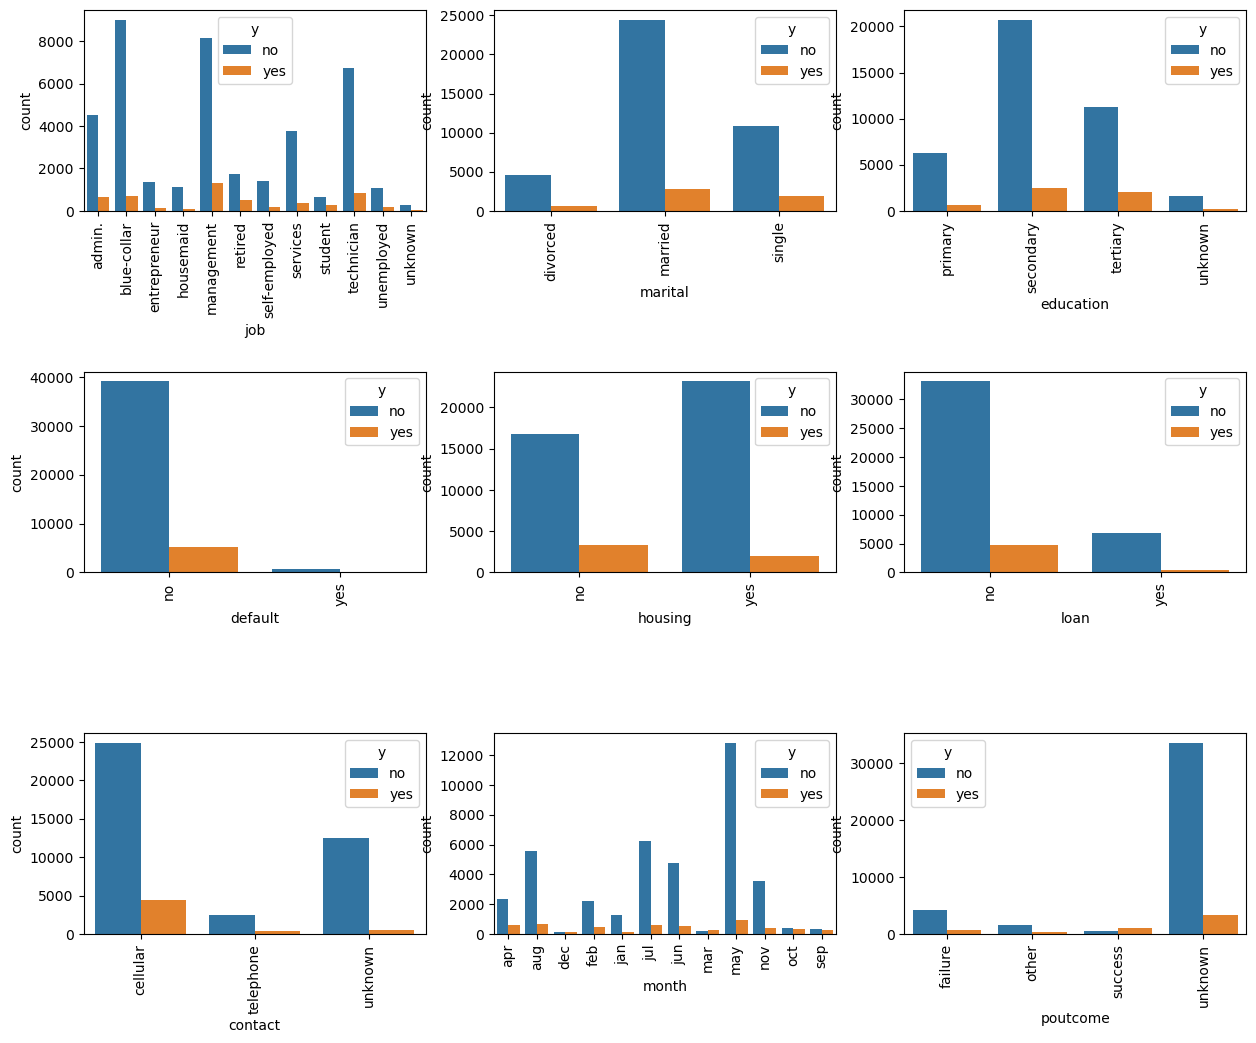

In [198]:
fig, axes = plt.subplots(3, 3, figsize=(15,12))
for j in range(0,3):
    for i, col in enumerate(category_feature[j*3:j*3 + 3]):
        sns.countplot(data = train_df, x = col, ax=axes[j, i], hue = 'y')
        axes[j, i].tick_params(axis='x', rotation=90)        
        
plt.subplots_adjust(hspace=0.8)
plt.show()

- Management have a higher subscription rate to a term deposit.
- The subscription rate to a term deposit is higher for married individuals than for single or divorced ones.
- The subscription rate to a term deposit is higher for those with a secondary education compared to tertiary or primary education.
- People with a credit do not subscribe to a term deposit.
- People without a housing loan have a higher subscription rate to a term deposit.
- People without any loan have a higher subscription rate to a term deposit.
- People using cellular services have a higher subscription rate to a term deposit.
- People who had their last call in May have a higher subscription rate to a term deposit compared to other months.
- The "Unknown" group subscribes more than other poutcome groups.

<Axes: >

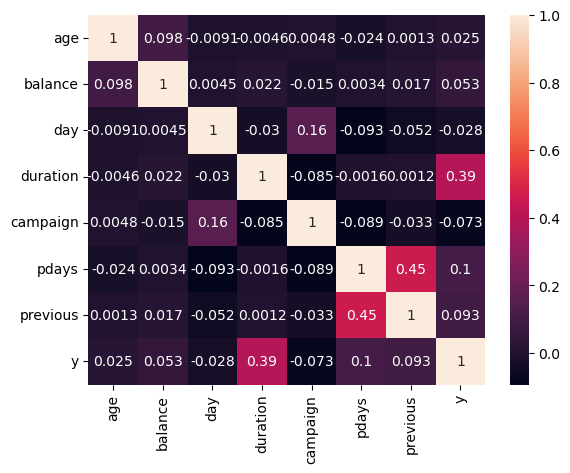

In [199]:
numeric_columns = train_df.drop(columns=category_feature)
numeric_columns['y'] = numeric_columns['y'].replace({'yes':1, 'no':0})
matrix = numeric_columns.corr()
sns.heatmap(matrix, annot=True)

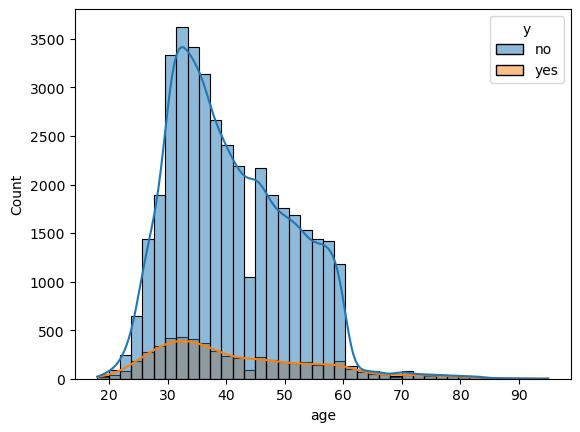

In [33]:
sns.histplot(data=train_df, x='age', hue='y', kde=True, bins=40);

- majorrity customer were about 25 - 60 age
- 30-40 age group had subcribe rate highter other age

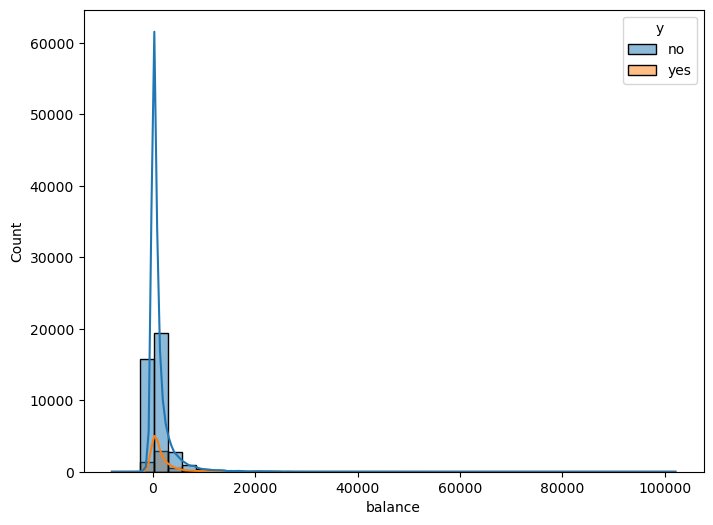

In [43]:
plt.figure(figsize = (8,6))
sns.histplot(data=train_df, x='balance', hue='y', kde=True, bins = 40)
plt.show()

- majorrity customer were balance about -5000 to 5000
- $0 balance group had subcribe rate highter other balance

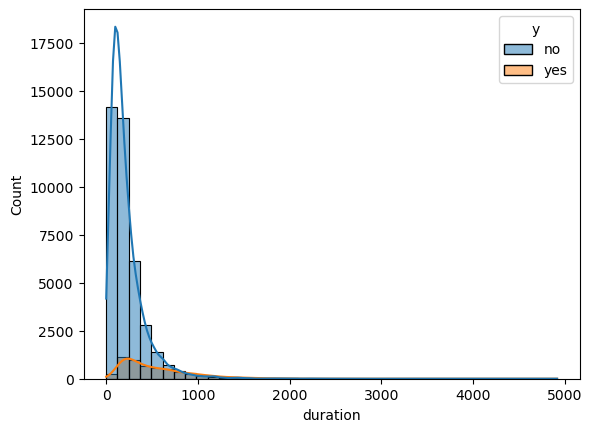

In [41]:
sns.histplot(data=train_df, x='duration', hue='y', kde=True, bins = 40);

- duration about 300s group had subcribe rate highter other duration

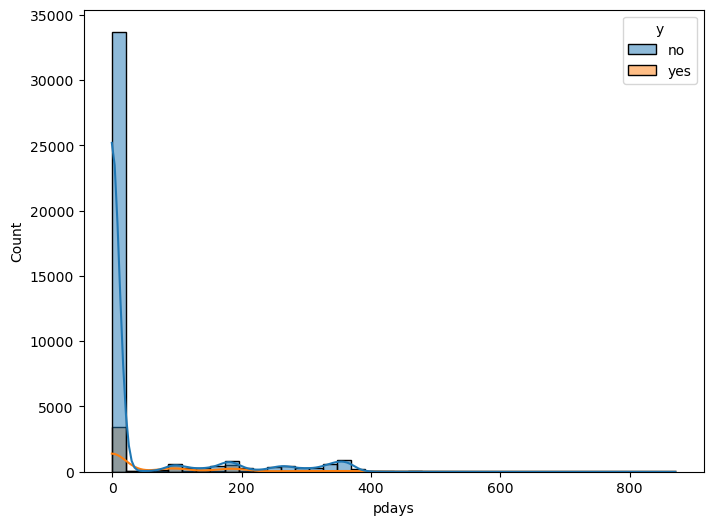

In [46]:
plt.figure(figsize = (8,6))
sns.histplot(data=train_df, x='pdays', hue='y', kde=True, bins = 40)
plt.show()

- Pdays about 10 times group had subcribe rate highter other pdays

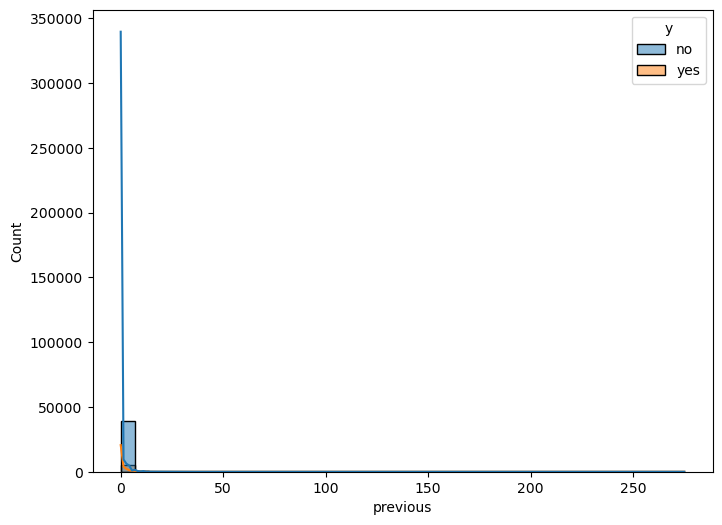

In [47]:
plt.figure(figsize = (8,6))
sns.histplot(data=train_df, x='previous', hue='y', kde=True, bins = 40)
plt.show()

- previous about 1-5 times group had subcribe rate highter other previous

## Data Wrangling

In [208]:
train_df = train_df[train_df['job'] != 'unknown']
train_df['education'].replace("unknown", train_df['education'].mode()[0], inplace = True)
train_df['contact'].replace("unknown", train_df['contact'].mode()[0], inplace = True)

In [209]:
cat_feature = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
num_feature = ['age', 'balance', 'duration', 'pdays', 'previous']
feature = num_feature + cat_feature
train_df[feature].head()

,age,balance,duration,pdays,previous,job,marital,education,default,housing,loan,contact,month
0,58.0,2143.0,261.0,-1.0,0.0,management,married,tertiary,no,yes,no,cellular,may
1,44.0,29.0,151.0,-1.0,0.0,technician,single,secondary,no,yes,no,cellular,may
2,33.0,2.0,76.0,-1.0,0.0,entrepreneur,married,secondary,no,yes,yes,cellular,may
3,47.0,1506.0,92.0,-1.0,0.0,blue-collar,married,secondary,no,yes,no,cellular,may
5,35.0,231.0,139.0,-1.0,0.0,management,married,tertiary,no,yes,no,cellular,may


In [210]:
test_df = test_df[test_df['job'] != 'unknown']
test_df['education'].replace("unknown", test_df['education'].mode()[0], inplace = True)
test_df['contact'].replace("unknown", test_df['contact'].mode()[0], inplace = True)

In [211]:
test_df[feature].head()

,age,balance,duration,pdays,previous,job,marital,education,default,housing,loan,contact,month
0,30.0,1787.0,79.0,-1.0,0.0,unemployed,married,primary,no,no,no,cellular,oct
1,33.0,4789.0,220.0,339.0,4.0,services,married,secondary,no,yes,yes,cellular,may
2,35.0,1350.0,185.0,330.0,1.0,management,single,tertiary,no,yes,no,cellular,apr
3,30.0,1476.0,199.0,-1.0,0.0,management,married,tertiary,no,yes,yes,cellular,jun
4,59.0,0.0,226.0,-1.0,0.0,blue-collar,married,secondary,no,yes,no,cellular,may


### Data Proprocessing

In [212]:
X = pd.get_dummies(train_df[feature], columns = cat_feature, dtype = 'int').values
X_test = pd.get_dummies(test_df[feature], columns = cat_feature, dtype = 'int').values
y = train_df['y'].replace({'yes': 1, 'no': 0})
y_test = test_df['y'].replace({'yes': 1, 'no': 0})

In [213]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[:, 0:5])
Xtest_scaled = scaler.fit_transform(X_test[:, 0:5])
X[:, 0:5] = X_scaled
X_test[:, 0:5] = Xtest_scaled
X[:, 0:5]

array([[ 1.61316659,  0.25725523,  0.01049689, -0.41216314, -0.2520498 ],
       [ 0.29294501, -0.43698451, -0.41633799, -0.41216314, -0.2520498 ],
       [-0.74437194, -0.44585134, -0.70736176, -0.41216314, -0.2520498 ],
       ...,
       [ 2.93338817,  1.43030363,  3.37085143,  1.43314922,  1.04718521],
       [ 1.51886505, -0.22713626,  0.96893519, -0.41216314, -0.2520498 ],
       [-0.36716578,  0.52917126,  0.39852859,  1.47304786,  4.5118119 ]])

In [214]:
print(X.shape)
print(X_test.shape)

(44923, 43)
(4483, 43)


## 4) Model training

In [215]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
print(f"Dimention X_train: {X_train.shape} Dimention y_train: {y_train.shape}")
print(f"Dimention X_val: {X_val.shape} Dimention y_val: {y_val.shape}")

Dimention X_train: (35938, 43) Dimention y_train: (35938,)
Dimention X_val: (8985, 43) Dimention y_val: (8985,)


### Base Model Comperison

In [216]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [217]:
seed = 2024
models = [
    LogisticRegression(solver='liblinear', max_iter=5000),
    DecisionTreeClassifier(random_state = seed),    
    KNeighborsClassifier(metric="minkowski", p=2),
    RandomForestClassifier(random_state=seed),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric = 'logloss', random_state=seed)
   
]

In [218]:
def baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    Kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=Kfold)
        for idx, score in enumerate (scores):
            entries.append((model_name, idx, score))
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])
    
    
    if plot_results:
        sns.boxplot(cv_df, x='model_name', y = 'accuracy_score')
        plt.xticks(rotation = 45)
        plt.show()
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    base_line = pd.concat([mean, std], axis = 1, ignore_index = True)
    base_line.columns = ['Mean', 'Standard Deviation']
    base_line.sort_values(by=['Mean'], ascending=False, inplace=True)
    return base_line

baseline_results(models, X, y, metrics='accuracy', cv=5, plot_results=False)

,Mean,Standard Deviation
model_name,,
XGBClassifier,0.900051,0.001625
RandomForestClassifier,0.899161,0.002046
GradientBoostingClassifier,0.899116,0.002318
LogisticRegression,0.893150,0.002120
AdaBoostClassifier,0.892861,0.002623
KNeighborsClassifier,0.890880,0.000409
ExtraTreesClassifier,0.886895,0.002683
DecisionTreeClassifier,0.864613,0.004491


In [219]:
rf = RandomForestClassifier(random_state=seed)
rf.fit(X_train, y_train)
y_pre = rf.predict(X_val)
y_pre

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [220]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pre))

0.9012799109627156


In [221]:
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [222]:
print(accuracy_score(y_test, y_pred))

0.9681017175998216
